## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [8]:
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 20s 400us/step - loss: 1.8991 - acc: 0.3125 - val_loss: 1.7353 - val_acc: 0.3779
Epoch 2/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.6778 - acc: 0.3996 - val_loss: 1.6183 - val_acc: 0.4230
Epoch 3/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.5877 - acc: 0.4338 - val_loss: 1.5693 - val_acc: 0.4341
Epoch 4/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.5434 - acc: 0.4496 - val_loss: 1.5344 - val_acc: 0.4550
Epoch 5/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.4943 - acc: 0.4665 - val_loss: 1.4775 - val_acc: 0.4647
Epoch 6/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.4508 - acc: 0.4810 - val_loss: 1.5013 - val_acc: 0.4627
Epoch 7/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.4275 - acc: 0.4910 - val_loss: 1.4653 -

Epoch 2/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.8130 - acc: 0.3640 - val_loss: 1.7713 - val_acc: 0.3754
Epoch 3/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.7377 - acc: 0.3905 - val_loss: 1.7403 - val_acc: 0.3717
Epoch 4/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.6775 - acc: 0.4123 - val_loss: 1.6528 - val_acc: 0.4141
Epoch 5/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.6291 - acc: 0.4269 - val_loss: 1.6091 - val_acc: 0.4317
Epoch 6/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.5881 - acc: 0.4410 - val_loss: 1.6053 - val_acc: 0.4292
Epoch 7/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.5584 - acc: 0.4510 - val_loss: 1.5576 - val_acc: 0.4509
Epoch 8/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.5306 - acc: 0.4632 - val_loss: 1.5345 - val_acc: 0.4562
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 9s 173us/step - loss: 2.2352 - acc: 0.2106 - val_loss: 2.2230 - val_acc: 0.2187
Epoch 5/50
50000/50000 [==============================] - 10s 193us/step - loss: 2.2180 - acc: 0.2203 - val_loss: 2.2073 - val_acc: 0.2283
Epoch 6/50
50000/50000 [==============================] - 10s 192us/step - loss: 2.2025 - acc: 0.2255 - val_loss: 2.1931 - val_acc: 0.2338
Epoch 7/50
50000/50000 [==============================] - 9s 190us/step - loss: 2.1882 - acc: 0.2333 - val_loss: 2.1795 - val_acc: 0.2402
Epoch 8/50
50000/50000 [==============================] - 10s 193us/step - loss: 2.1747 - acc: 0.2365 - val_loss: 2.1666 - val_acc: 0.2451
Epoch 9/50
50000/50000 [==============================] - 10s 193us/step - loss: 2.1617 - acc: 0.2432 - val_loss: 2.1541 - val_acc: 0.2482
Epoch 10/50
50000/50000 [==============================] - 10s 192us/step - loss: 2.1495 - acc: 0.2460 - val_loss: 2.1424 - val_acc: 0.2527
Epoch 11/50
50000/50000 [==============

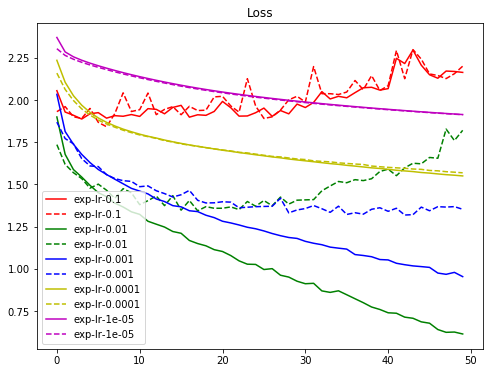

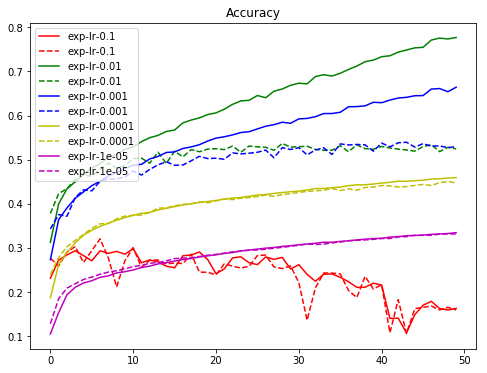

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()